TITLE & stuff

# 1. Import Data & Libraries

In [1]:
import pandas as pd

from ydata_profiling import ProfileReport

# viz
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Data**

In [2]:
df = pd.read_csv('./Case1_HotelCustomerSegmentation.csv', sep = ';', index_col = 'ID')
df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


# 2. Data Exploration

Profiling Report

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

- 89 (0.1%) duplicates
- 5173 (0.2%) missing
- many imbalanced variables 
- high % of zeros in some variables

In [4]:
df.describe(include='object').T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


- DistributionChannel, MarketSegment --> encode
- Nationality - ?
- NameHash, DocIDHash - too many uniques, discard
- missing val in DocIDHash

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


- weird age min & max
- missing val in age
- AverageLeadTime = -1 ?
- RoomNights w/ very high max
- PersonsNights w/ very high max
- if RoomNights = 0 and PersonsNights = 0 the person did not stay in the hotel (?)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

In [7]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 20
    if df[column].nunique() < 9:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'BookingsCanceled': [ 1  0  3  2  4 15  7  5]
Number of unique values: 8

Unique values in 'BookingsNoShowed': [0 1 2 3]
Number of unique values: 4

Unique values in 'DistributionChannel': ['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
Number of unique values: 4

Unique values in 'MarketSegment': ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Number of unique values: 7

Unique values in 'SRHighFloor': [0 1]
Number of unique values: 2

Unique values in 'SRLowFloor': [0 1]
Number of unique values: 2

Unique values in 'SRAccessibleRoom': [0 1]
Number of unique values: 2

Unique values in 'SRMediumFloor': [0 1]
Number of unique values: 2

Unique values in 'SRBathtub': [0 1]
Number of unique values: 2

Unique values in 'SRShower': [0 1]
Number of unique values: 2

Unique values in 'SRCrib': [0 1]
Number of unique values: 2

Unique values in 'SRKingSizeBed': [0 1]
Number of unique values: 2

Unique values in 'SRTwinB

In [8]:
df.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

explore previous segmentation

In [9]:
df.groupby('MarketSegment')[df.select_dtypes(include=['float64', 'int64']).columns].mean().T


MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
Age,50.984906,41.424188,45.476946,42.633978,54.987702,43.348875,51.217725
DaysSinceCreation,698.013889,607.106545,604.455817,536.652081,661.408254,591.624309,616.172935
AverageLeadTime,5.336806,21.687976,23.738997,40.111104,95.776896,53.608810,94.408304
LodgingRevenue,530.432465,22.027032,305.144661,306.455248,270.408032,299.012173,213.977329
OtherRevenue,80.760590,15.155236,64.018570,66.661558,68.812907,62.530171,70.016510
BookingsCanceled,0.072917,0.048706,0.053907,0.001772,0.000262,0.000110,0.000306
BookingsNoShowed,0.024306,0.000000,0.017059,0.000367,0.000000,0.000000,0.000245
BookingsCheckedIn,1.461806,1.141553,1.442511,0.693699,0.817032,0.692007,0.748120
PersonsNights,5.145833,3.216134,3.394405,4.065453,3.554227,4.537374,4.517459
RoomNights,4.989583,1.990868,2.835892,1.976532,2.282436,2.163945,2.377668


## 2.1 Variable Exploration 

In [10]:
# consider 0/1 cols as categ cols ?

num_cols = [col for col in df.columns if 
               pd.api.types.is_numeric_dtype(df[col])]

obj_cols = [col for col in df.columns if col not in num_cols]

### 2.1.1 Univariate Analysis

**Numeric Variables**

In [11]:



def histograms(df, columns = num_cols, n_cols = 3):
    
    n_rows = (len(columns) // n_cols) + (len(columns) % n_cols > 0)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten axes
    axes = axes.flatten()

    # Plot histograms for each column 
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.hist(df[col].dropna(), edgecolor='black', color='orange')
        ax.set_title(f'Histogram of {col}', fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    # Remove empty subplots (if any)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



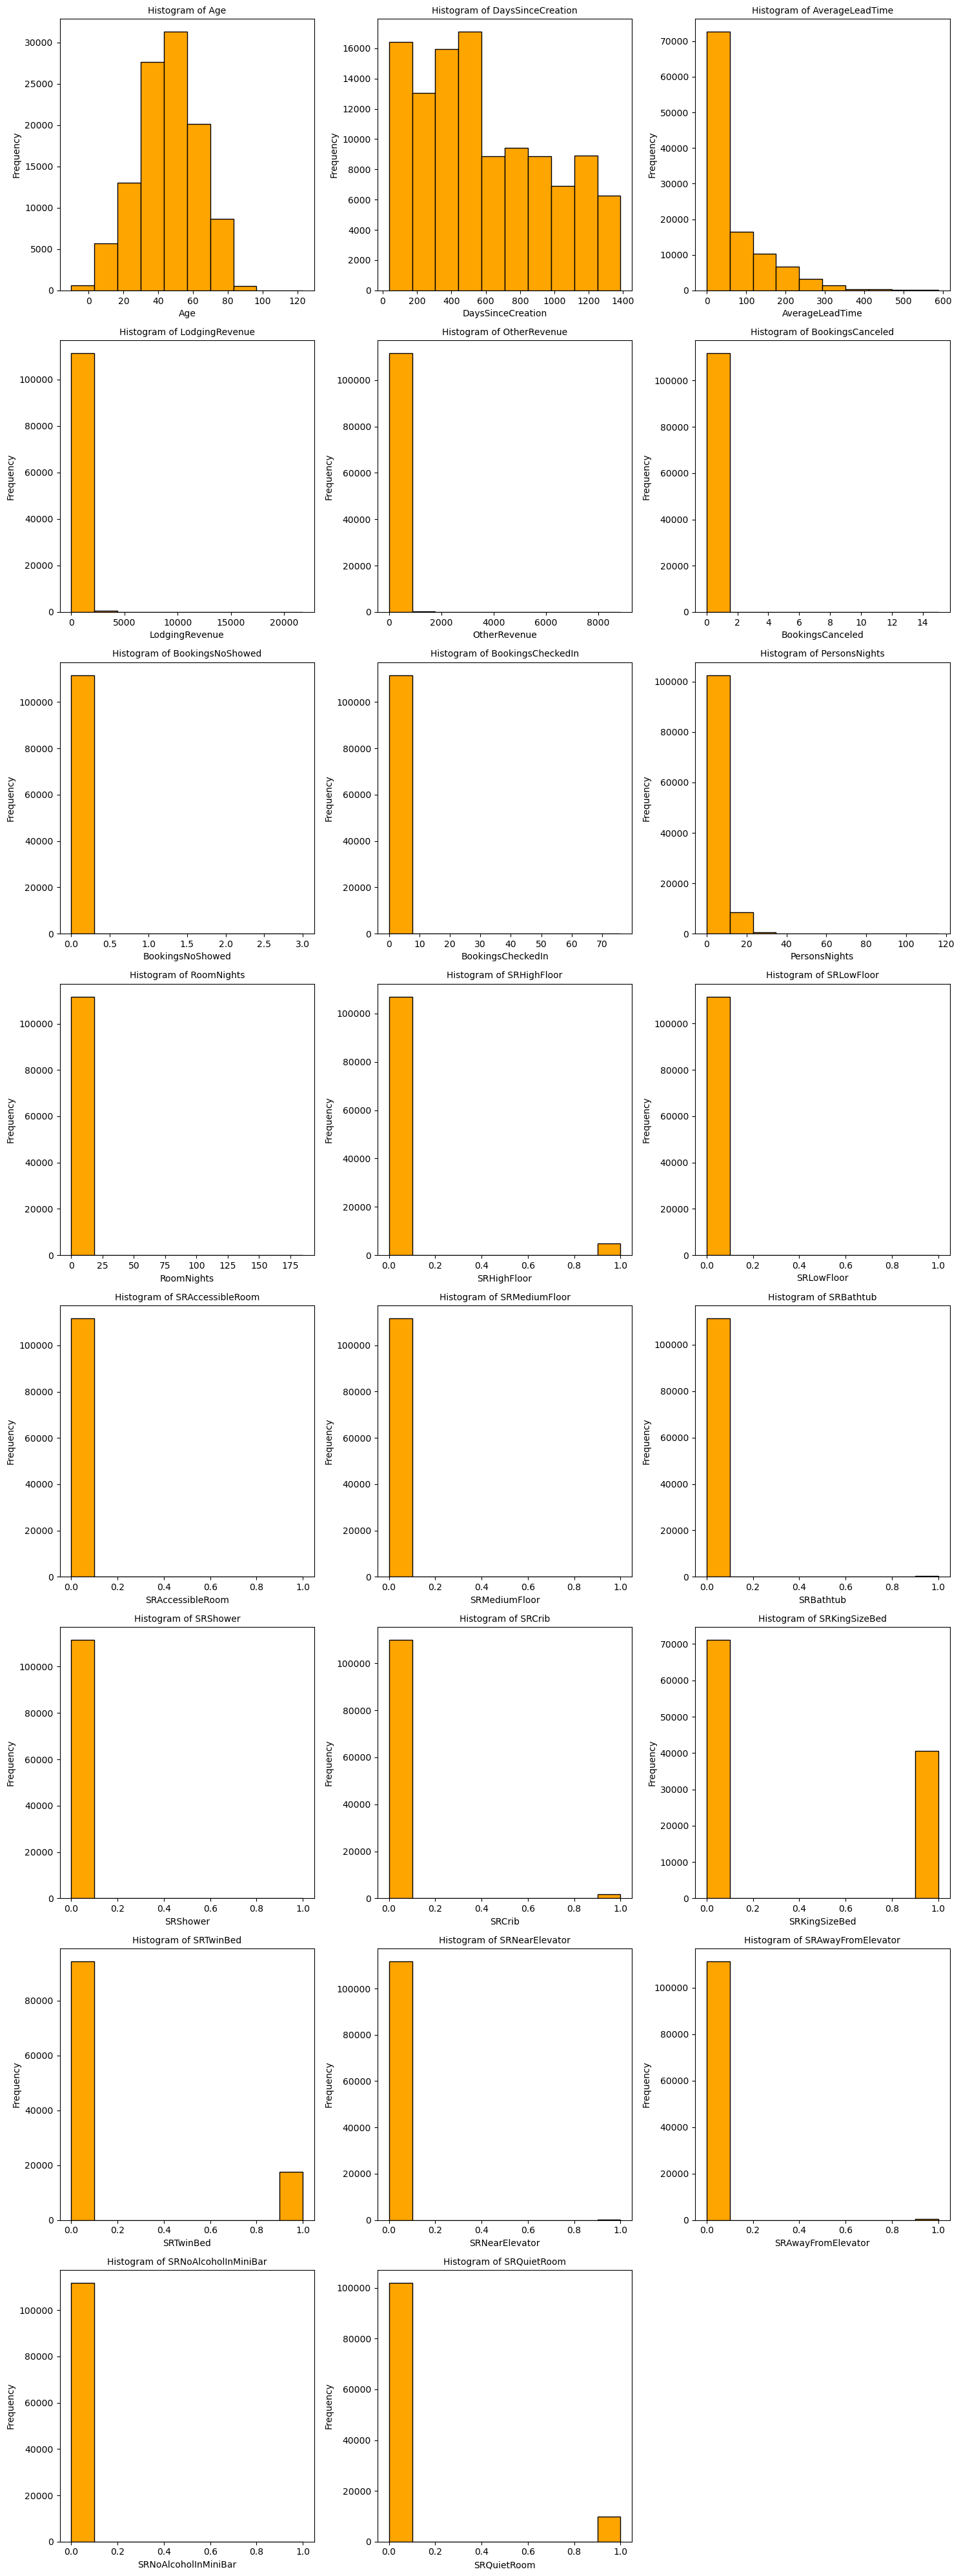

In [22]:
histograms(df)

In [30]:
for col in num_cols:
    print(df[col].describe())
    print('')
    print('-- / --')
    print('')

count    107561.000000
mean         45.639191
std          17.244952
min         -10.000000
25%          33.000000
50%          47.000000
75%          58.000000
max         123.000000
Name: Age, dtype: float64

-- / --

count    111733.000000
mean        595.026599
std         374.657382
min          36.000000
25%         288.000000
50%         522.000000
75%         889.000000
max        1385.000000
Name: DaysSinceCreation, dtype: float64

-- / --

count    111733.000000
mean         60.833147
std          85.115320
min          -1.000000
25%           0.000000
50%          21.000000
75%          95.000000
max         588.000000
Name: AverageLeadTime, dtype: float64

-- / --

count    111733.000000
mean        283.851283
std         379.131556
min           0.000000
25%           0.000000
50%         208.000000
75%         393.300000
max       21781.000000
Name: LodgingRevenue, dtype: float64

-- / --

count    111733.000000
mean         64.682802
std         123.580715
min           

INSIGHTS

**Categorical Variables**

In [12]:
def categ_histogram(df, column, rotation = 45):

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], discrete=True, color='orange', kde=False)
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=rotation)
    plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


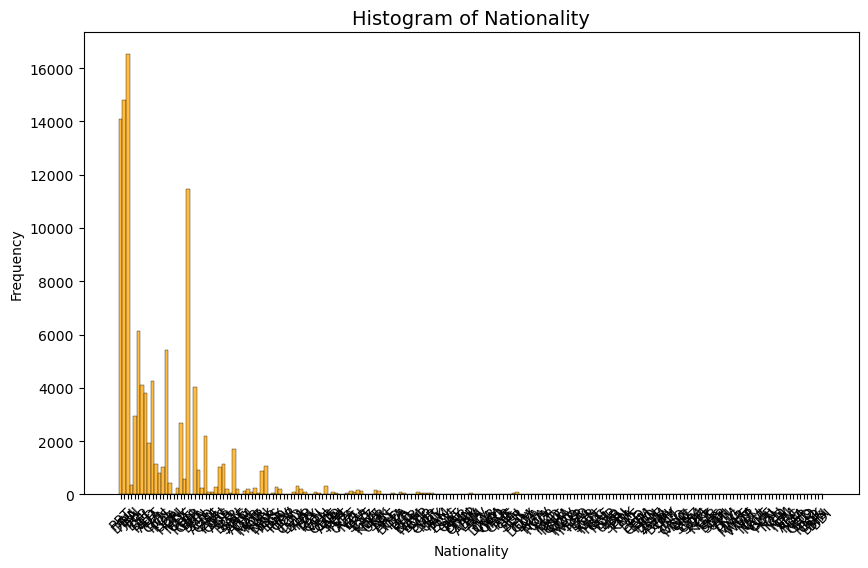

In [35]:
categ_histogram(df, obj_cols[0])    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


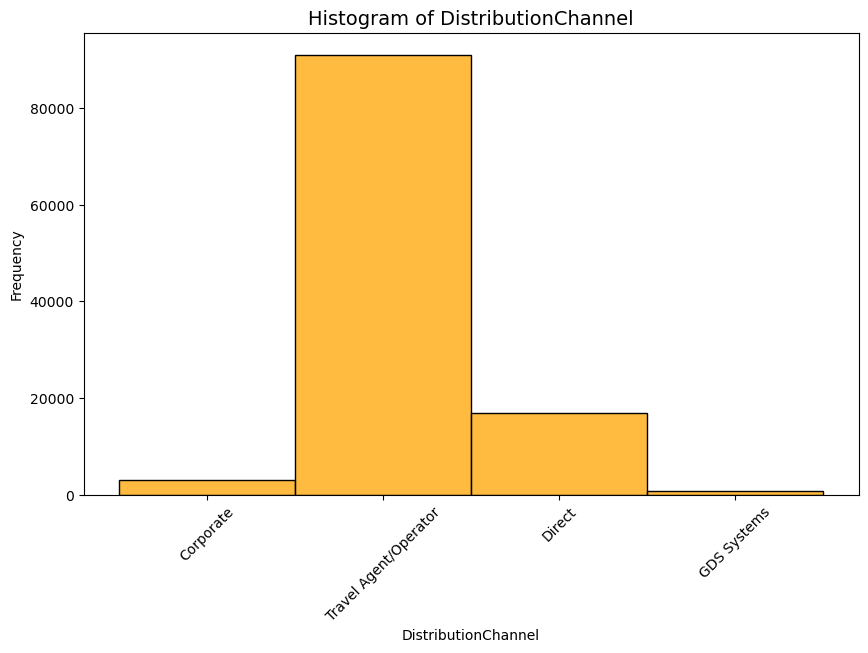

In [8]:
categ_histogram(df, obj_cols[3])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


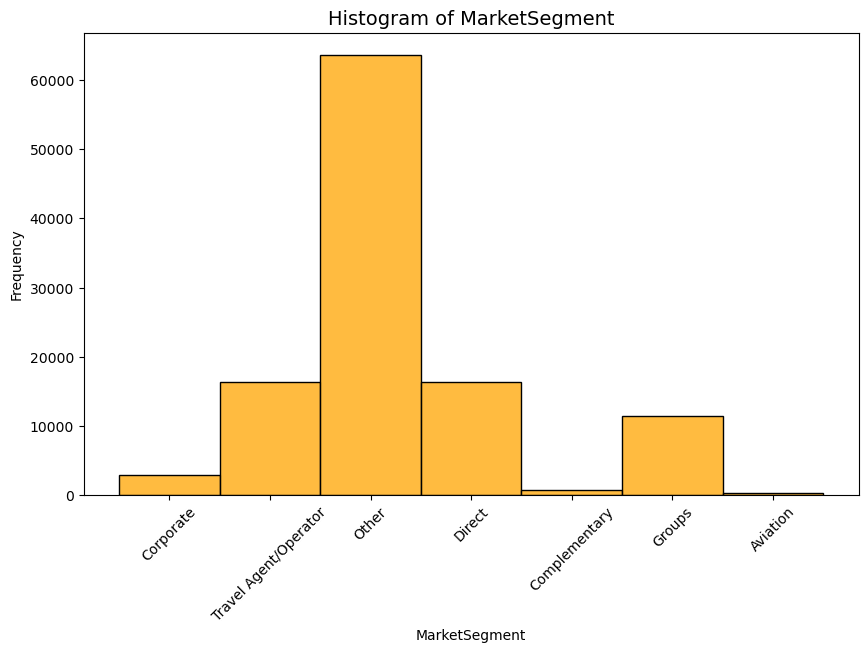

In [9]:
categ_histogram(df, obj_cols[4])

### 2.1.2 Bivariate Analysis

**Numerical vs Numerical**

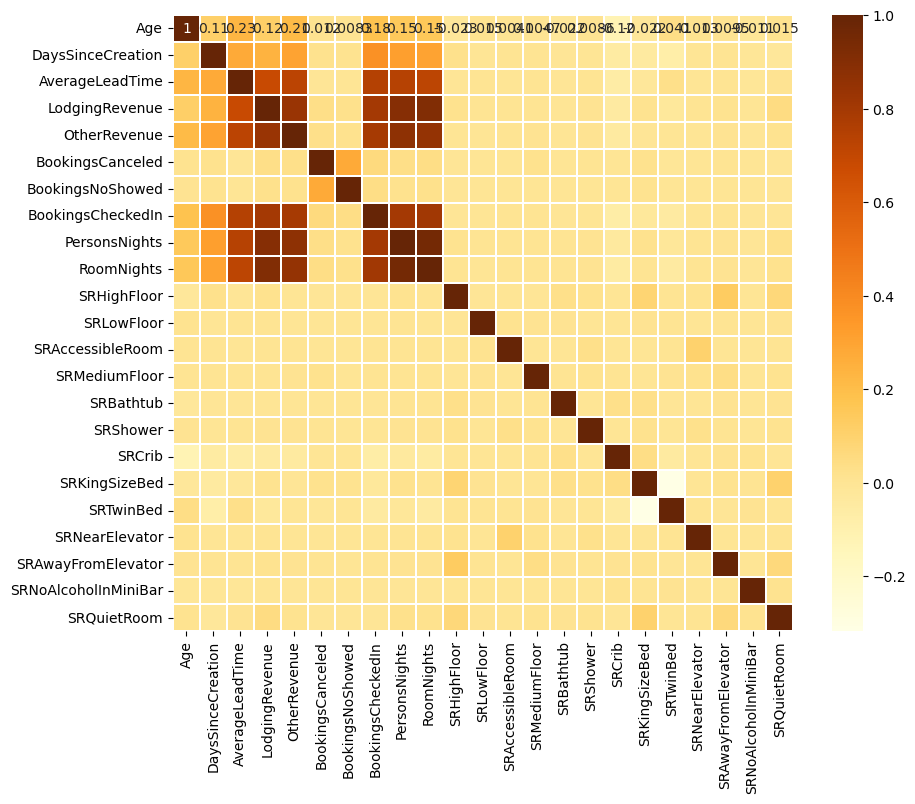

In [13]:
# Remove rows with missing values
temp = df.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1)
plt.show()

In [14]:
def plot_pairwise_relationship(df, num_columns):

    # Create a pairplot with only the lower triangle
    g = sns.pairplot(df[num_columns], kind='scatter', 
                 hue=None, plot_kws={'s': 10, 'color': 'orange'}, 
                 corner=True) 
    
    # Update the diagonal plots to be orange
    for ax in g.diag_axes:
        for patch in ax.patches:
            patch.set_facecolor('orange')

        
    plt.show()

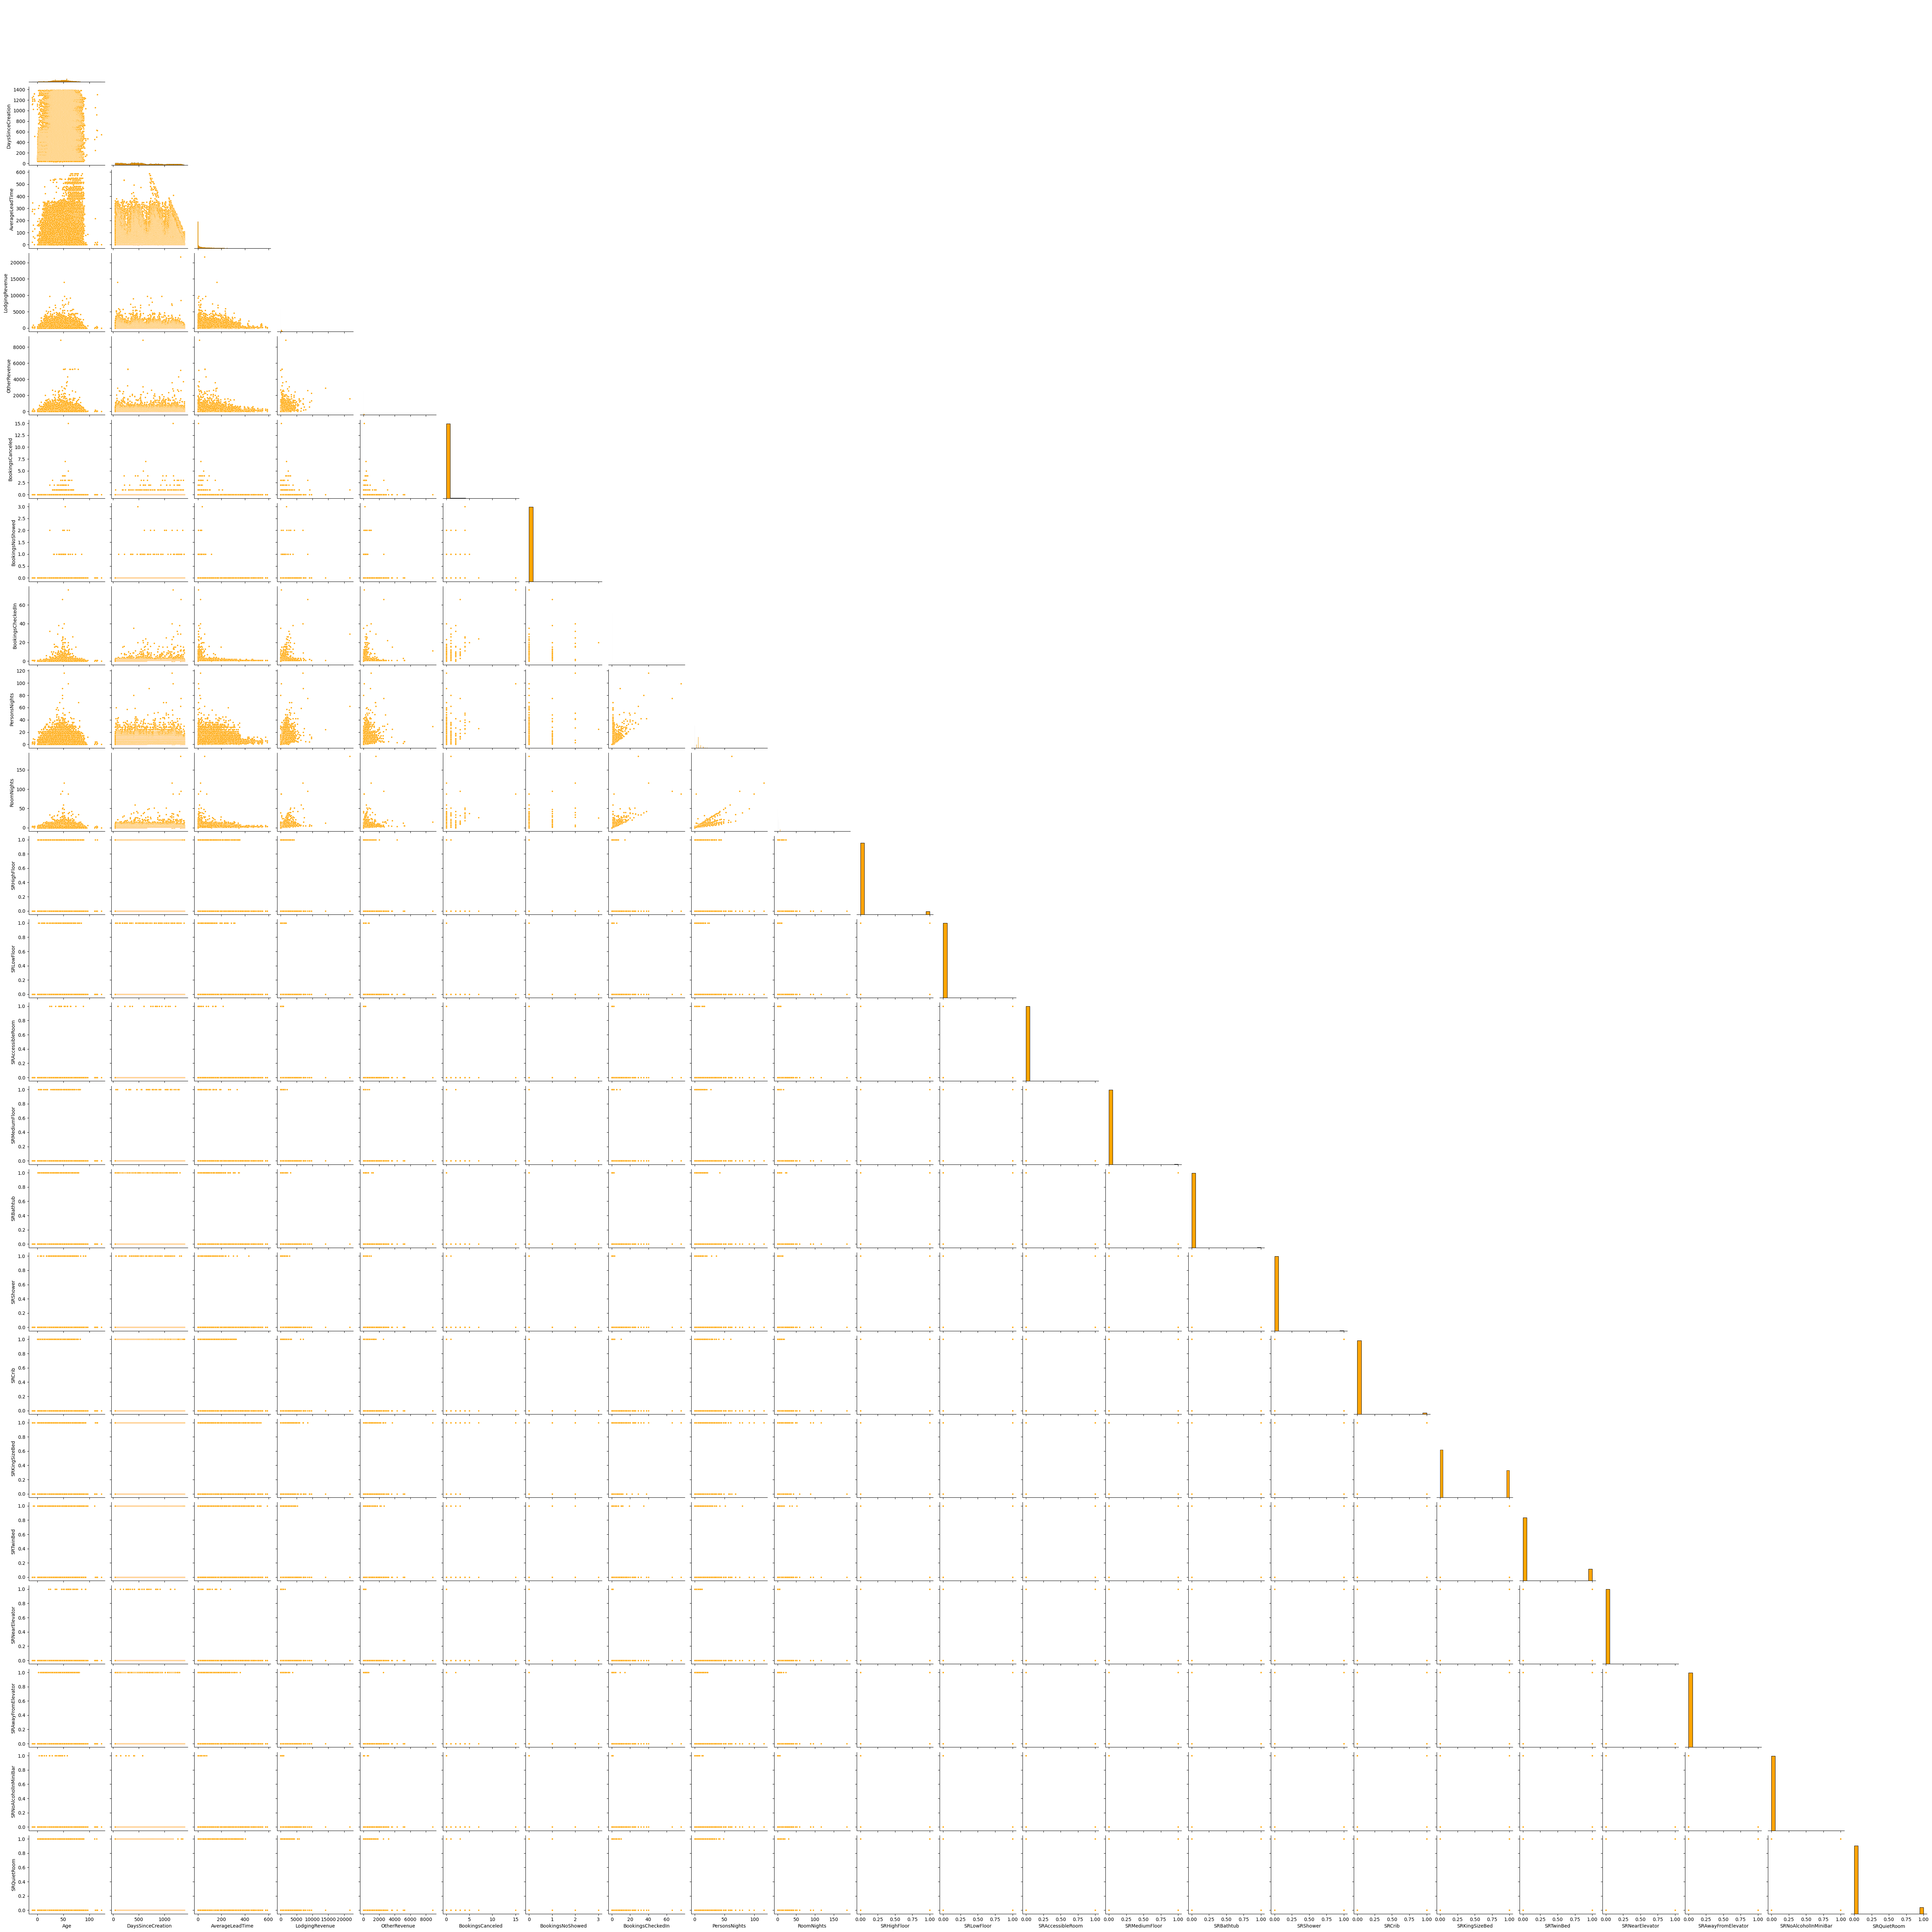

In [15]:
plot_pairwise_relationship(df, num_cols)

**Numerical vs Categorical**

**Categorical vs Categorical**

# 3. Data Cleaning and Preprocessing

## 3.1 Duplicates

In [17]:
df[df.duplicated()]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
595,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
702,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,0,0,0,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
1111,PRT,NaN,1345,0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
1391,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
1403,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105601,PRT,NaN,84,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
107560,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
107561,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df = df.drop_duplicates()

## 3.2 Feature Engineering

## 3.3 Missing Values

## 3.4 Outliers

# Export

In [ ]:
# df.to_csv('./treated_data.csv')